## RQ1

In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

In [63]:
''' imports '''
import pandas as pd
import numpy as np
from loader import Loader
import matplotlib.pyplot as plt
%matplotlib notebook

''' data paths '''
data = {
    'jan': {
        'path': 'data/yellow_tripdata_2018-01.csv',
        'start': '2018-01-01',
        'end': '2018-01-31'
    },
    'feb': {
        'path': 'data/yellow_tripdata_2018-02.csv',
        'start': '2018-02-01',
        'end': '2018-02-28'
    },
    'mar': {
        'path': 'data/yellow_tripdata_2018-03.csv',
        'start': '2018-03-01',
        'end': '2018-03-31'
    },
    'apr': {
        'path': 'data/yellow_tripdata_2018-04.csv',
        'start': '2018-04-01',
        'end': '2018-04-30'
    },
    'may': {
        'path': 'data/yellow_tripdata_2018-05.csv',
        'start': '2018-05-01',
        'end': '2018-05-31'
    },
    'jun': {
        'path': 'data/yellow_tripdata_2018-06.csv',
        'start': '2018-06-01',
        'end': '2018-06-30'
    }
}
locations = 'data/taxi_zone_lookup.csv'
MONTHS = [(m, data[m]['path']) for m in data.keys()]

Let's use a Loader class, created ad hoc, to simplify some operations 

In [64]:
# read data for each month
loader = Loader(csv=MONTHS, chunksize=100000)

# preparing locations to be merged on-the-fly when iterating
loader.merge(csv=locations, usecols=['LocationID', 'Borough'], on=('PULocationID', 'LocationID'), direction='left', drop_on_columns=True)

# get data generator
data_iterator = loader.iterate(usecols=['tpep_pickup_datetime', 'PULocationID'], parse_dates=['tpep_pickup_datetime'], date_index='tpep_pickup_datetime')

In [65]:
''' working with each borough '''
# declaring two counters to enhance verbosity
tot_rows = 0
processed_rows = 0

# count will be stored here
# and incremented chunk by chunk
days_borough = {}

dg_bkp = {}

# iterate over chunks
for month, d in data_iterator:
    
    # info
    tot_rows += len(d.index)
    
    # remove older or newer items keeping only the ones
    # strictly related to the considered month
    d = d.loc[data[month]['start'] : data[month]['end']]
    
    # drop any row with missing values
    d = d.dropna()
    
    # we want to use tpep_pickup_datetime for data
    # aggregation and it cannot be an index
    d['Day'] = d.index.day
    d = d.reset_index()
    
    # remove useless column
    d = d.drop('tpep_pickup_datetime', axis=1)
    
    # info
    processed_rows += len(d.index)
    
    # group by Day and Borough
    dg = d[['Day', 'Borough']].groupby(['Borough', 'Day'])['Day'].size()
    
    # backing up important values
    if not month in dg_bkp: dg_bkp[month] = None
    dg_bkp[month] = dg if dg_bkp[month] is None else dg_bkp[month].add(dg, fill_value=0)
    
print(str(processed_rows) + ' over ' + str(tot_rows) + ' rows have been processed')

53922022 over 53925735 rows have been processed


Borough       Bronx     Brooklyn        EWR      Manhattan        Queens  \
count     31.000000    31.000000  31.000000      31.000000     31.000000   
mean     238.354839  3233.548387  18.419355  256948.258065  16996.387097   
std       58.463406   791.882392   7.121677   40519.778898   2709.874876   
min      166.000000  1165.000000   7.000000  112143.000000   6310.000000   
25%      198.500000  2736.000000  13.000000  235318.500000  16136.000000   
50%      231.000000  3228.000000  17.000000  264515.000000  17466.000000   
75%      261.000000  3748.500000  21.500000  289497.500000  18637.500000   
max      477.000000  5226.000000  39.000000  307778.000000  20115.000000   

Borough  Staten Island      Unknown  
count        31.000000    31.000000  
mean          4.645161  5125.935484  
std           5.326340   972.582436  
min           1.000000  2415.000000  
25%           2.000000  4707.500000  
50%           3.000000  5054.000000  
75%           5.000000  5717.000000  
max        

<IPython.core.display.Javascript object>


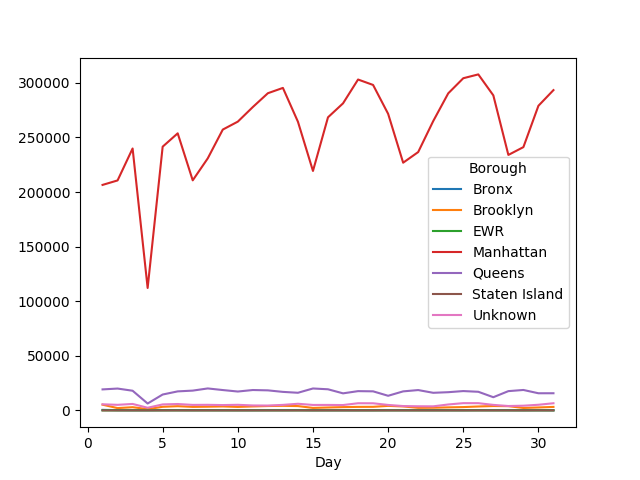

Borough       Bronx     Brooklyn        EWR      Manhattan       Queens  \
count     28.000000    28.000000  28.000000      28.000000     28.00000   
mean     234.500000  3396.000000  17.750000  277401.035714  17303.00000   
std       40.764454   611.788574   5.803096   28287.776891   2593.68171   
min      164.000000  2286.000000   9.000000  214550.000000  11899.00000   
25%      208.500000  2889.000000  13.000000  255930.750000  16100.50000   
50%      236.000000  3345.500000  16.500000  288229.000000  17378.00000   
75%      274.250000  3930.500000  21.000000  296699.750000  18836.75000   
max      308.000000  4558.000000  30.000000  322591.000000  21715.00000   

Borough  Staten Island      Unknown  
count        26.000000    28.000000  
mean          4.153846  4907.071429  
std           2.894026   900.285137  
min           1.000000  3247.000000  
25%           3.000000  4233.250000  
50%           3.000000  4925.500000  
75%           4.750000  5434.000000  
max          14.0000

<IPython.core.display.Javascript object>


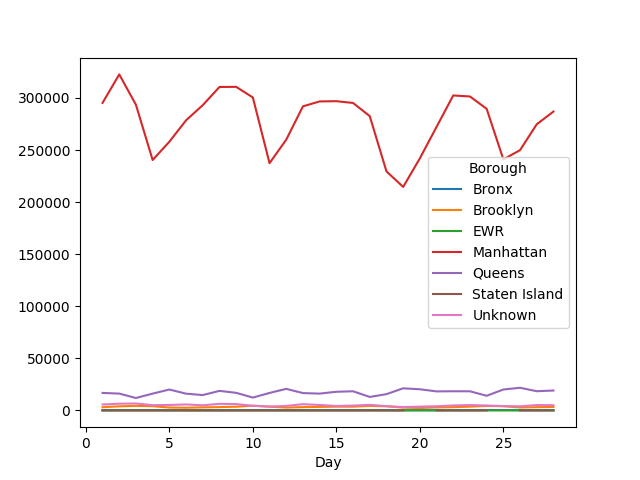

Borough       Bronx     Brooklyn        EWR      Manhattan        Queens  \
count     31.000000    31.000000  31.000000      31.000000     31.000000   
mean     333.225806  3965.387097  21.258065  276368.612903  18218.709677   
std      109.227197   996.570141   7.861161   32078.053942   3766.329931   
min      168.000000  1776.000000   7.000000  173312.000000   5798.000000   
25%      286.500000  3322.000000  15.000000  258672.500000  16673.000000   
50%      325.000000  3673.000000  23.000000  282854.000000  19473.000000   
75%      366.000000  4732.000000  25.500000  297402.000000  20470.000000   
max      835.000000  6223.000000  35.000000  318228.000000  22187.000000   

Borough  Staten Island      Unknown  
count        31.000000    31.000000  
mean          4.483871  5250.935484  
std           2.896791   928.439656  
min           1.000000  2558.000000  
25%           2.000000  4709.500000  
50%           4.000000  5166.000000  
75%           7.000000  6001.000000  
max        

<IPython.core.display.Javascript object>


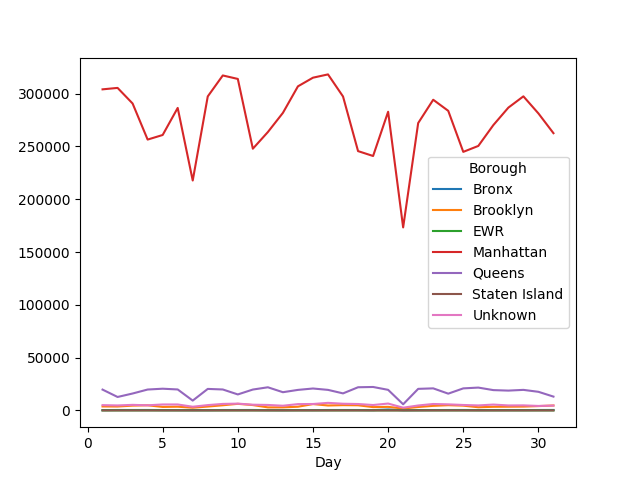

Borough       Bronx     Brooklyn        EWR      Manhattan        Queens  \
count     30.000000    30.000000  30.000000      30.000000     30.000000   
mean     347.933333  3968.800000  23.266667  280945.200000  19876.400000   
std       64.566423  1099.503129   6.405457   26381.955396   2351.429904   
min      255.000000  2493.000000  14.000000  216499.000000  14374.000000   
25%      294.250000  3116.500000  19.000000  257114.250000  19398.500000   
50%      351.000000  3699.000000  22.000000  291347.500000  20449.000000   
75%      371.750000  4750.750000  28.000000  298682.500000  21276.500000   
max      524.000000  7462.000000  41.000000  319924.000000  22995.000000   

Borough  Staten Island      Unknown  
count        30.000000    30.000000  
mean          4.300000  5001.666667  
std           2.437494   622.415945  
min           1.000000  4006.000000  
25%           2.250000  4574.500000  
50%           4.000000  4893.500000  
75%           5.750000  5438.000000  
max        

<IPython.core.display.Javascript object>


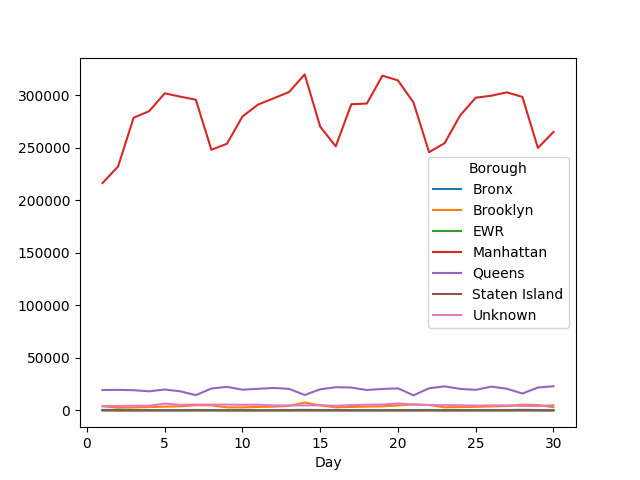

Borough       Bronx     Brooklyn        EWR      Manhattan        Queens  \
count     31.000000    31.000000  31.000000      31.000000     31.000000   
mean     350.741935  3961.516129  24.225806  269345.419355  19703.064516   
std       61.215449   864.132007   7.374323   34399.378192   2614.154573   
min      226.000000  2604.000000  10.000000  160786.000000  13123.000000   
25%      309.500000  3365.000000  20.000000  252108.500000  19191.000000   
50%      347.000000  3783.000000  25.000000  277552.000000  19857.000000   
75%      377.500000  4543.000000  28.000000  292540.000000  21710.000000   
max      543.000000  5935.000000  42.000000  306618.000000  23328.000000   

Borough  Staten Island      Unknown  
count        31.000000    31.000000  
mean          4.645161  4150.548387  
std           2.388143   623.579016  
min           1.000000  2450.000000  
25%           3.000000  3884.000000  
50%           4.000000  4158.000000  
75%           6.000000  4516.500000  
max        

<IPython.core.display.Javascript object>


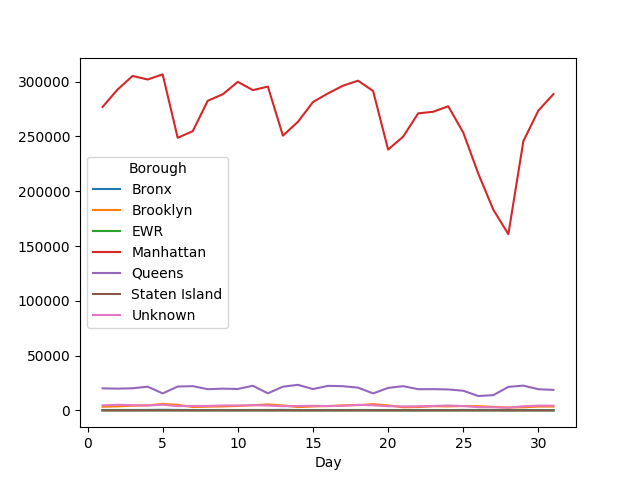

Borough       Bronx     Brooklyn        EWR      Manhattan        Queens  \
count     30.000000    30.000000  30.000000      30.000000     30.000000   
mean     340.433333  4098.400000  22.600000  262610.700000  19157.466667   
std       68.293324   723.727259   4.782151   22172.372508   2200.364730   
min      205.000000  2801.000000  12.000000  217142.000000  14598.000000   
25%      303.000000  3600.250000  19.250000  249700.500000  18516.750000   
50%      322.000000  4152.500000  21.500000  267846.500000  19334.500000   
75%      371.250000  4704.750000  26.000000  282394.250000  20386.000000   
max      542.000000  5301.000000  31.000000  292101.000000  23331.000000   

Borough  Staten Island      Unknown  
count        28.000000    30.000000  
mean          5.392857  4208.933333  
std           2.643501   291.569230  
min           1.000000  3511.000000  
25%           3.000000  4037.250000  
50%           5.000000  4270.500000  
75%           8.000000  4376.500000  
max        

<IPython.core.display.Javascript object>


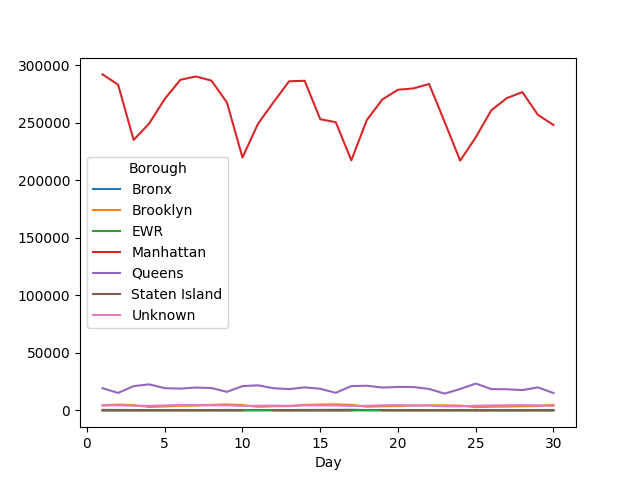

In [67]:
# plotting borough for each month from Jan to Jun
for m in dg_bkp.keys():
    df = dg_bkp[m].unstack().T
    print(df.describe())
    df.plot()

Borough   Bronx  Brooklyn    EWR  Manhattan    Queens  Staten Island  Unknown
Day                                                                          
1        2332.0   23753.0  144.0  1591338.0  114579.0           23.0  29105.0
2        1959.0   21008.0  129.0  1647014.0  103462.0           31.0  30123.0
3        1925.0   23508.0  136.0  1642991.0  106405.0           26.0  31052.0
4        1820.0   20664.0  143.0  1445326.0  104673.0           24.0  25140.0
5        1946.0   22304.0  112.0  1639650.0  109846.0           24.0  32239.0
6        1770.0   22961.0  141.0  1653647.0  112190.0           38.0  31103.0
7        1648.0   20727.0  102.0  1562412.0   98671.0           30.0  27736.0
8        1735.0   23159.0  107.0  1656180.0  118852.0           32.0  30339.0
9        1850.0   23777.0  115.0  1695188.0  113726.0           21.0  31602.0
10       1830.0   25453.0  113.0  1678440.0  105094.0           29.0  29624.0
11       1839.0   23389.0  132.0  1595739.0  120059.0           

<IPython.core.display.Javascript object>


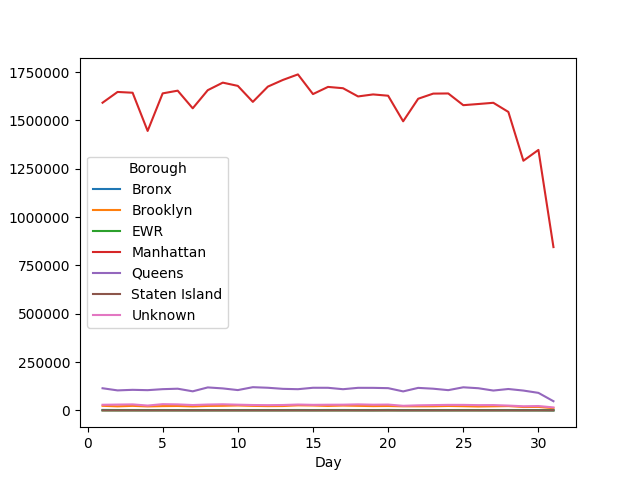

In [68]:
# plotting borough for each month from Jan to Jun
nyc = None

for m in dg_bkp.keys():
    df = dg_bkp[m].unstack().T
    nyc = df if nyc is None else nyc.add(df, fill_value=0)

print(nyc)
nyc.plot()